# Data Acquisition & Preparation

In [2]:
#   Data Acquisition & Preparation

# 1. Install and Import Required Packages
!pip install -q ucimlrepo
!pip install -q ydata_profiling  # formerly pandas_profiling
!pip install -q pandera

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pandera as pa
from pandera import DataFrameSchema, Column, Check

#from ydata_profiling import ProfileReport
from ucimlrepo import fetch_ucirepo

sns.set_theme(style="whitegrid")


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


=== Metadata ===
{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symb

,ID,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,0,1,1,1,40,1,0,0,0,0,...,0,5,18,15,1,0,9,4,3,0
1,1,0,0,0,25,1,0,0,1,0,...,1,3,0,0,0,0,7,6,1,0
2,2,1,1,1,28,0,0,0,0,1,...,1,5,30,30,1,0,9,4,8,0
3,3,1,0,1,27,0,0,0,1,1,...,0,2,0,0,0,0,11,3,6,0
4,4,1,1,1,24,0,0,0,1,1,...,0,2,3,0,0,0,11,5,4,0



=== Final Columns in X ===
['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
Shape of X: (253680, 21)
Shape of y: (253680,)

Missing values in X:
 HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Missing values in y:
 0

Number of duplicated IDs: 0

Data types in X:
 HighBP   

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000



=== Correlation Matrix (Numeric Features) ===


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HighBP,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,-0.061266,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,-0.039874,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,0.006121,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,-0.062275,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,-0.030678,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,-0.041124,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
HeartDiseaseorAttack,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,-0.039167,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
PhysActivity,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,0.153150,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,0.254342,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929
Veggies,-0.061266,-0.039874,0.006121,-0.062275,-0.030678,-0.041124,-0.039167,0.153150,0.254342,1.000000,...,0.029584,-0.032232,-0.123066,-0.058884,-0.064290,-0.080506,-0.064765,-0.009771,0.154329,0.151087


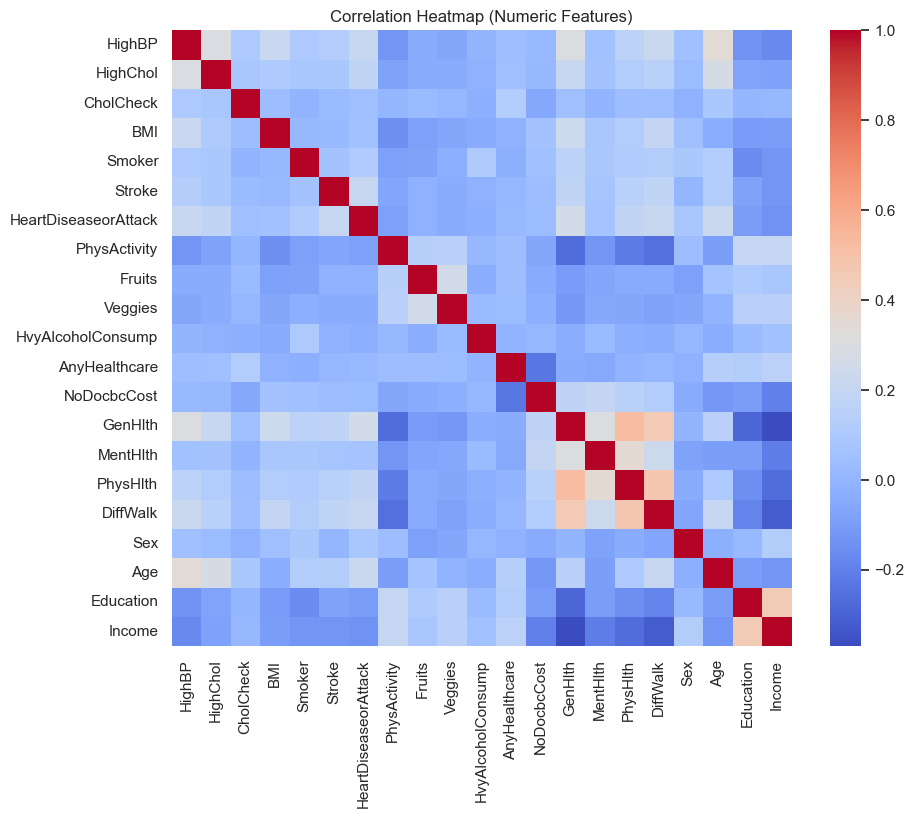


Correlation between BMI and Age (binned 1..13): -0.037

Data validation passed with pandera! No schema violations found.

Number of BMI values outside [10, 100]: 0

=== X_encoded Example (One-Hot for Sex, Education, Income) ===
Original shape: (253680, 21), Encoded shape: (253680, 31)


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,Education_4,Education_5,Education_6,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Income_8
0,1,1,1,40,1,0,0,0,0,1,...,True,False,False,False,True,False,False,False,False,False
1,0,0,0,25,1,0,0,1,0,0,...,False,False,True,False,False,False,False,False,False,False
2,1,1,1,28,0,0,0,0,1,0,...,True,False,False,False,False,False,False,False,False,True
3,1,0,1,27,0,0,0,1,1,1,...,False,False,False,False,False,False,False,True,False,False
4,1,1,1,24,0,0,0,1,1,1,...,False,True,False,False,False,True,False,False,False,False



=== Final Data Summary ===
Shape of X: (253680, 21)
Shape of y: (253680,)
Columns in X: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
Sample of ID Column: [0, 1, 2, 3, 4]

Sample of X after cleaning and optional capping:


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4


In [3]:
# 2. Fetch Metadata and Attempt to Construct a Full DataFrame
cdc_data = fetch_ucirepo(id=891)

# Print metadata for confirmation
print("=== Metadata ===")
print(cdc_data.metadata)

# Attempt to retrieve a raw/full DataFrame. If not available, manually combine features + target.
df = None
try:
    df = cdc_data.data.raw  # This often may be None for certain repos
except AttributeError:
    pass

if df is None:
    # cdc_data.data.features => X
    # cdc_data.data.targets  => y
    X = cdc_data.data.features
    y = cdc_data.data.targets

    # If 'ID' is not in X, use the index as a fallback:
    if 'ID' not in X.columns:
        print("\n'ID' column not found in features. Attempting to use the DataFrame index as ID.")
        X = X.reset_index().rename(columns={'index': 'ID'})

    # Combine features + target
    if 'Diabetes_binary' not in X.columns:
        df = pd.concat([X, y], axis=1)
    else:
        # If features already have 'Diabetes_binary', just use X
        df = X.copy()
        if not df['Diabetes_binary'].equals(y.squeeze()):
            raise ValueError("Mismatch between existing 'Diabetes_binary' in X and y.")

if df is None:
    raise ValueError("Failed to build a full DataFrame.")

print("\n=== Full Raw DataFrame Shape ===")
print(df.shape)

print("\n=== First 5 Rows of Full DataFrame ===")
display(df.head())

# 3. Separate Into Features (X) and Target (y)
if 'Diabetes_binary' not in df.columns:
    raise ValueError("Target column 'Diabetes_binary' not found in the DataFrame.")

ID_col = df['ID'] if 'ID' in df.columns else None
feature_cols = [col for col in df.columns if col not in ['ID', 'Diabetes_binary']]
X = df[feature_cols].copy()
y = df['Diabetes_binary'].copy()

print("\n=== Final Columns in X ===")
print(X.columns.tolist())
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# 4. Basic Data Quality Checks
print("\nMissing values in X:\n", X.isnull().sum())
print("\nMissing values in y:\n", y.isnull().sum())

# Duplicates by ID if ID exists:
if ID_col is not None:
    duplicates_by_id = df.duplicated(subset=['ID'], keep=False)
    num_duplicates = duplicates_by_id.sum()
    print(f"\nNumber of duplicated IDs: {num_duplicates}")
    if num_duplicates > 0:
        print("\nSample duplicated rows based on 'ID':")
        display(df[duplicates_by_id].head(10))
else:
    print("\nNo 'ID' column available to check for duplicates by ID.")

# Show data types
print("\nData types in X:\n", X.dtypes)
print("Data type of y:", y.dtype)

# Basic stats
print("\n--- Descriptive Statistics ---")
display(X.describe(include='all'))

# 5. Domain Logic Checks
if 'Age' in X.columns:
    invalid_age = X[~X['Age'].between(1, 13)]
    if len(invalid_age) > 0:
        print(f"\nFound {len(invalid_age)} rows with invalid Age:")
        display(invalid_age)
        # Decide how to handle them: drop, or set to nearest valid category, etc.

# 6. Correlation Checks (numeric features)
# Identify numeric columns
numeric_cols = [col for col in X.columns if pd.api.types.is_numeric_dtype(X[col])]
# Create correlation matrix
corr_matrix = X[numeric_cols].corr()
print("\n=== Correlation Matrix (Numeric Features) ===")
display(corr_matrix)

# Optional: Visualize correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

# For example, check correlation between Age (1..13 bucket) and BMI
if 'Age' in X.columns and 'BMI' in X.columns:
    corr_bmi_age = corr_matrix.loc['BMI', 'Age']
    print(f"\nCorrelation between BMI and Age (binned 1..13): {corr_bmi_age:.3f}")

# 7. pandera Data Validation
# Because we found BMI values up to 98, let's expand allowable range to 100:
schema_dict = {}
possible_binary_cols = [
    'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
    'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
    'NoDocbcCost', 'DiffWalk', 'Sex'
]
for col in possible_binary_cols:
    if col in X.columns:
        schema_dict[col] = Column(
            int,
            Check(lambda s: s.isin([0, 1])),
            nullable=False
        )

# Expand BMI upper bound to 100:
if 'BMI' in X.columns:
    schema_dict['BMI'] = Column(
        int,
        Check(lambda s: (s >= 10) & (s <= 100)),  # updated range
        nullable=False
    )

if 'Age' in X.columns:
    schema_dict['Age'] = Column(
        int,
        Check(lambda s: (s >= 1) & (s <= 13)),
        nullable=False
    )

df_schema = DataFrameSchema(schema_dict)

try:
    X_validated = df_schema.validate(X, lazy=True)
    print("\nData validation passed with pandera! No schema violations found.")
except pa.errors.SchemaErrors as e:
    print("\nSchema validation errors encountered:\n", e.failure_cases)
    # If errors remain, investigate or handle out-of-range rows.

# 8. Formal Outlier Decision for BMI
# Example approach: cap BMI at 100 if you prefer not to discard these records
if 'BMI' in X.columns:
    outlier_mask = (X['BMI'] < 10) | (X['BMI'] > 100)
    num_outliers_bmi = outlier_mask.sum()
    print(f"\nNumber of BMI values outside [10, 100]: {num_outliers_bmi}")

    if num_outliers_bmi > 0:
        print("\nCapping BMI values to [10, 100] range...")
        X['BMI'] = X['BMI'].clip(lower=10, upper=100)

# Alternatively, you could drop or separately analyze these outliers:
# X = X[~outlier_mask]
# y = y[~outlier_mask]

# 9. Categorical Encoding for Next Steps
categorical_cols = []
if 'Sex' in X.columns:
    categorical_cols.append('Sex')
if 'Education' in X.columns:
    categorical_cols.append('Education')
if 'Income' in X.columns:
    categorical_cols.append('Income')

# We show one-hot encoding (get_dummies) for demonstration
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print("\n=== X_encoded Example (One-Hot for Sex, Education, Income) ===")
print(f"Original shape: {X.shape}, Encoded shape: {X_encoded.shape}")
display(X_encoded.head())

# If you prefer ordinal encoding:
# from sklearn.preprocessing import OrdinalEncoder
# ord_enc = OrdinalEncoder()
# X[['Education', 'Income']] = ord_enc.fit_transform(X[['Education','Income']])

# 10. Final Data Summary & Documentation
print("\n=== Final Data Summary ===")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Columns in X:", X.columns.tolist())
if ID_col is not None:
    print("Sample of ID Column:", ID_col.head().tolist())

print("\nSample of X after cleaning and optional capping:")
display(X.head())

# Exploratory Data Analysis (EDA)

EDA helps you understand the shape, patterns, and
anomalies in your dataset. Through visualizations and summary statistics, you’ll detect
relationships and guide your modeling strategy. Incorporating unsupervised learning at
this stage can reveal hidden structure in your data and provide valuable intuition.

* Conduct an initial investigation to understand the structure, trends, and potential
issues in the data.
* Use visualizations and descriptive statistics to generate insights and guide your
next steps.
* Incorporate unsupervised learning methods (e.g., clustering or dimensionality
reduction) to discover structure, reduce complexity, or engineering features

In [4]:
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap
from sklearn.decomposition import PCA, NMF
from sklearn.cluster import KMeans, SpectralClustering, SpectralBiclustering,AgglomerativeClustering
from sklearn.mixture import GaussianMixture

np.random.seed(0)

In [5]:
cont_cols = ['BMI'] 
ordinal_numeric_cols = ['GenHlth','MentHlth','PhysHlth','Age','Education','Income'] #not exactly integers but not exactly binary. Ranges
binary_cols = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 
                    'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 
                    'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 
                    'DiffWalk', 'Sex'] #0 or 1

print("Continuous column: ", cont_cols)
print("Ordinal numeric columns:", ordinal_numeric_cols)
print("Binary columns:", binary_cols)


Continuous column:  ['BMI']
Ordinal numeric columns: ['GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
Binary columns: ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']


In [6]:
print("Summary statistics for  column:")
print(df[cont_cols].describe())

print("Summary statistics for ordinal numeric columns:")
print(df[ordinal_numeric_cols].describe())

Summary statistics for  column:
                 BMI
count  253680.000000
mean       28.382364
std         6.608694
min        12.000000
25%        24.000000
50%        27.000000
75%        31.000000
max        98.000000
Summary statistics for ordinal numeric columns:
             GenHlth       MentHlth       PhysHlth            Age  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        2.511392       3.184772       4.242081       8.032119   
std         1.068477       7.412847       8.717951       3.054220   
min         1.000000       0.000000       0.000000       1.000000   
25%         2.000000       0.000000       0.000000       6.000000   
50%         2.000000       0.000000       0.000000       8.000000   
75%         3.000000       2.000000       3.000000      10.000000   
max         5.000000      30.000000      30.000000      13.000000   

           Education         Income  
count  253680.000000  253680.000000  
mean        5.050434       6.0538

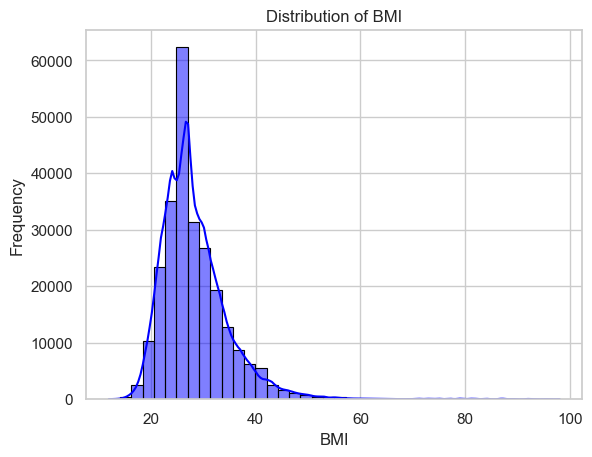

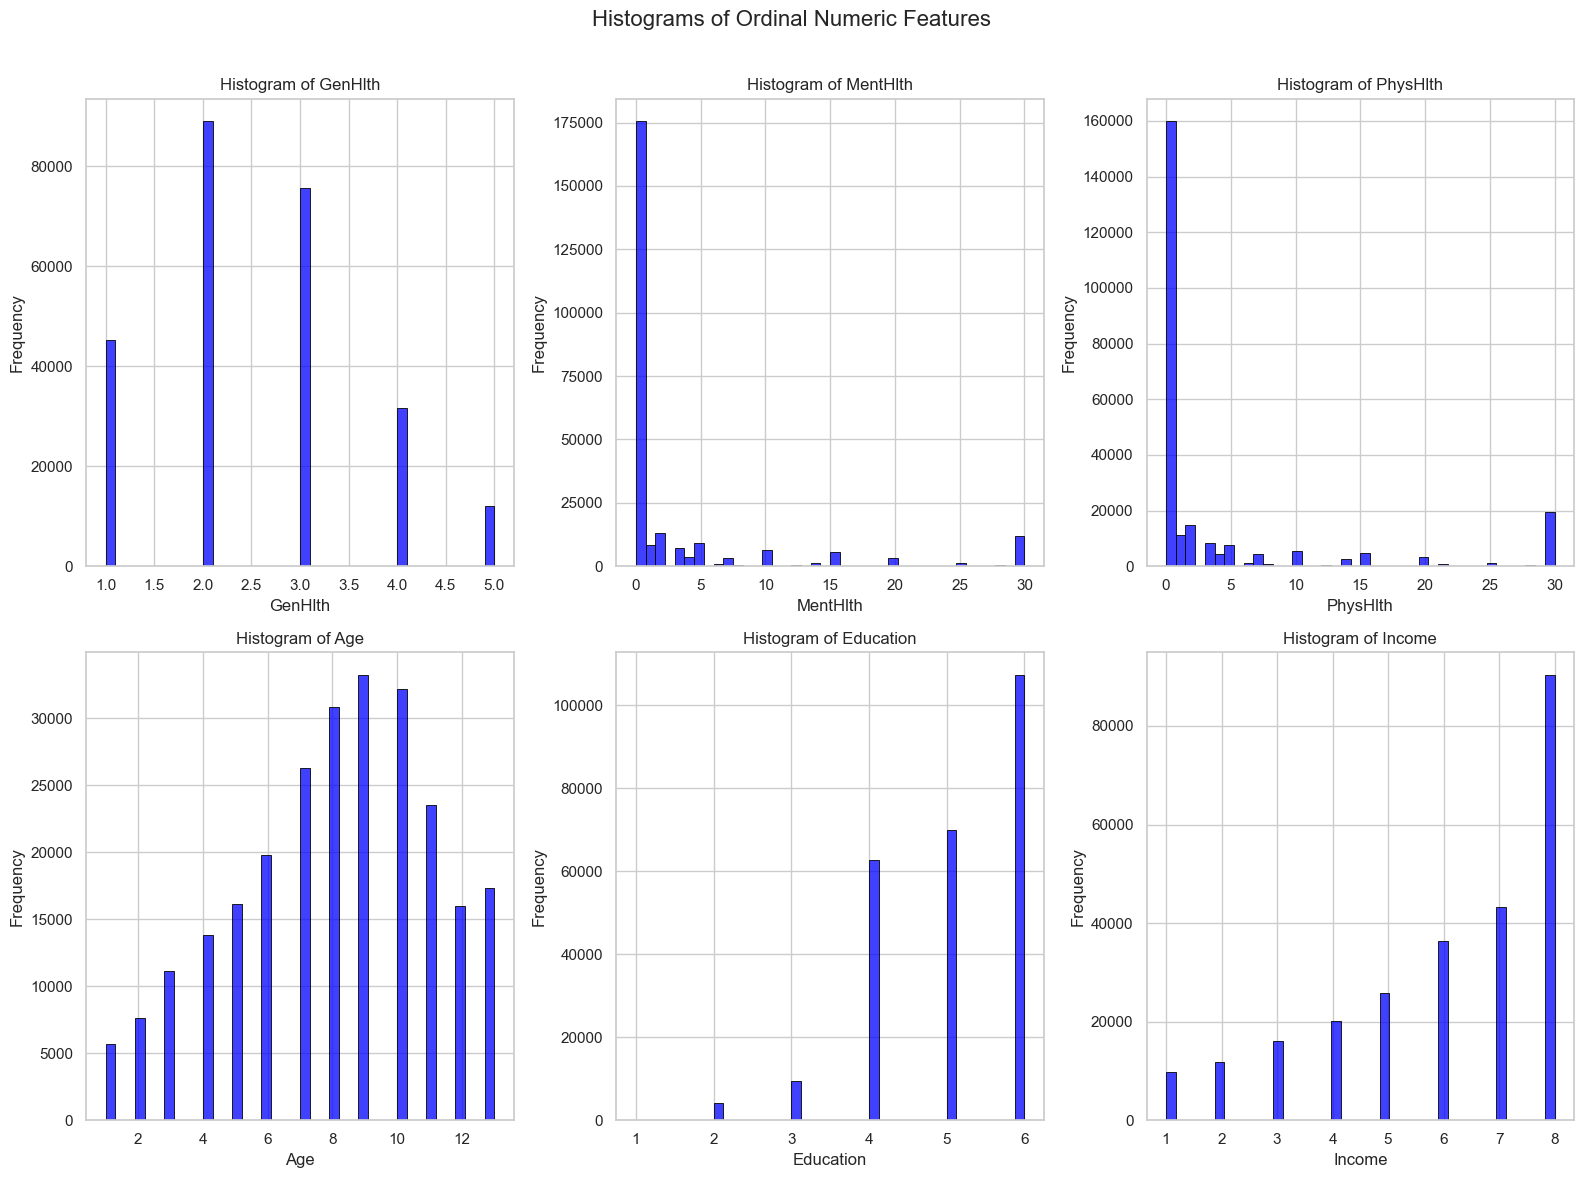

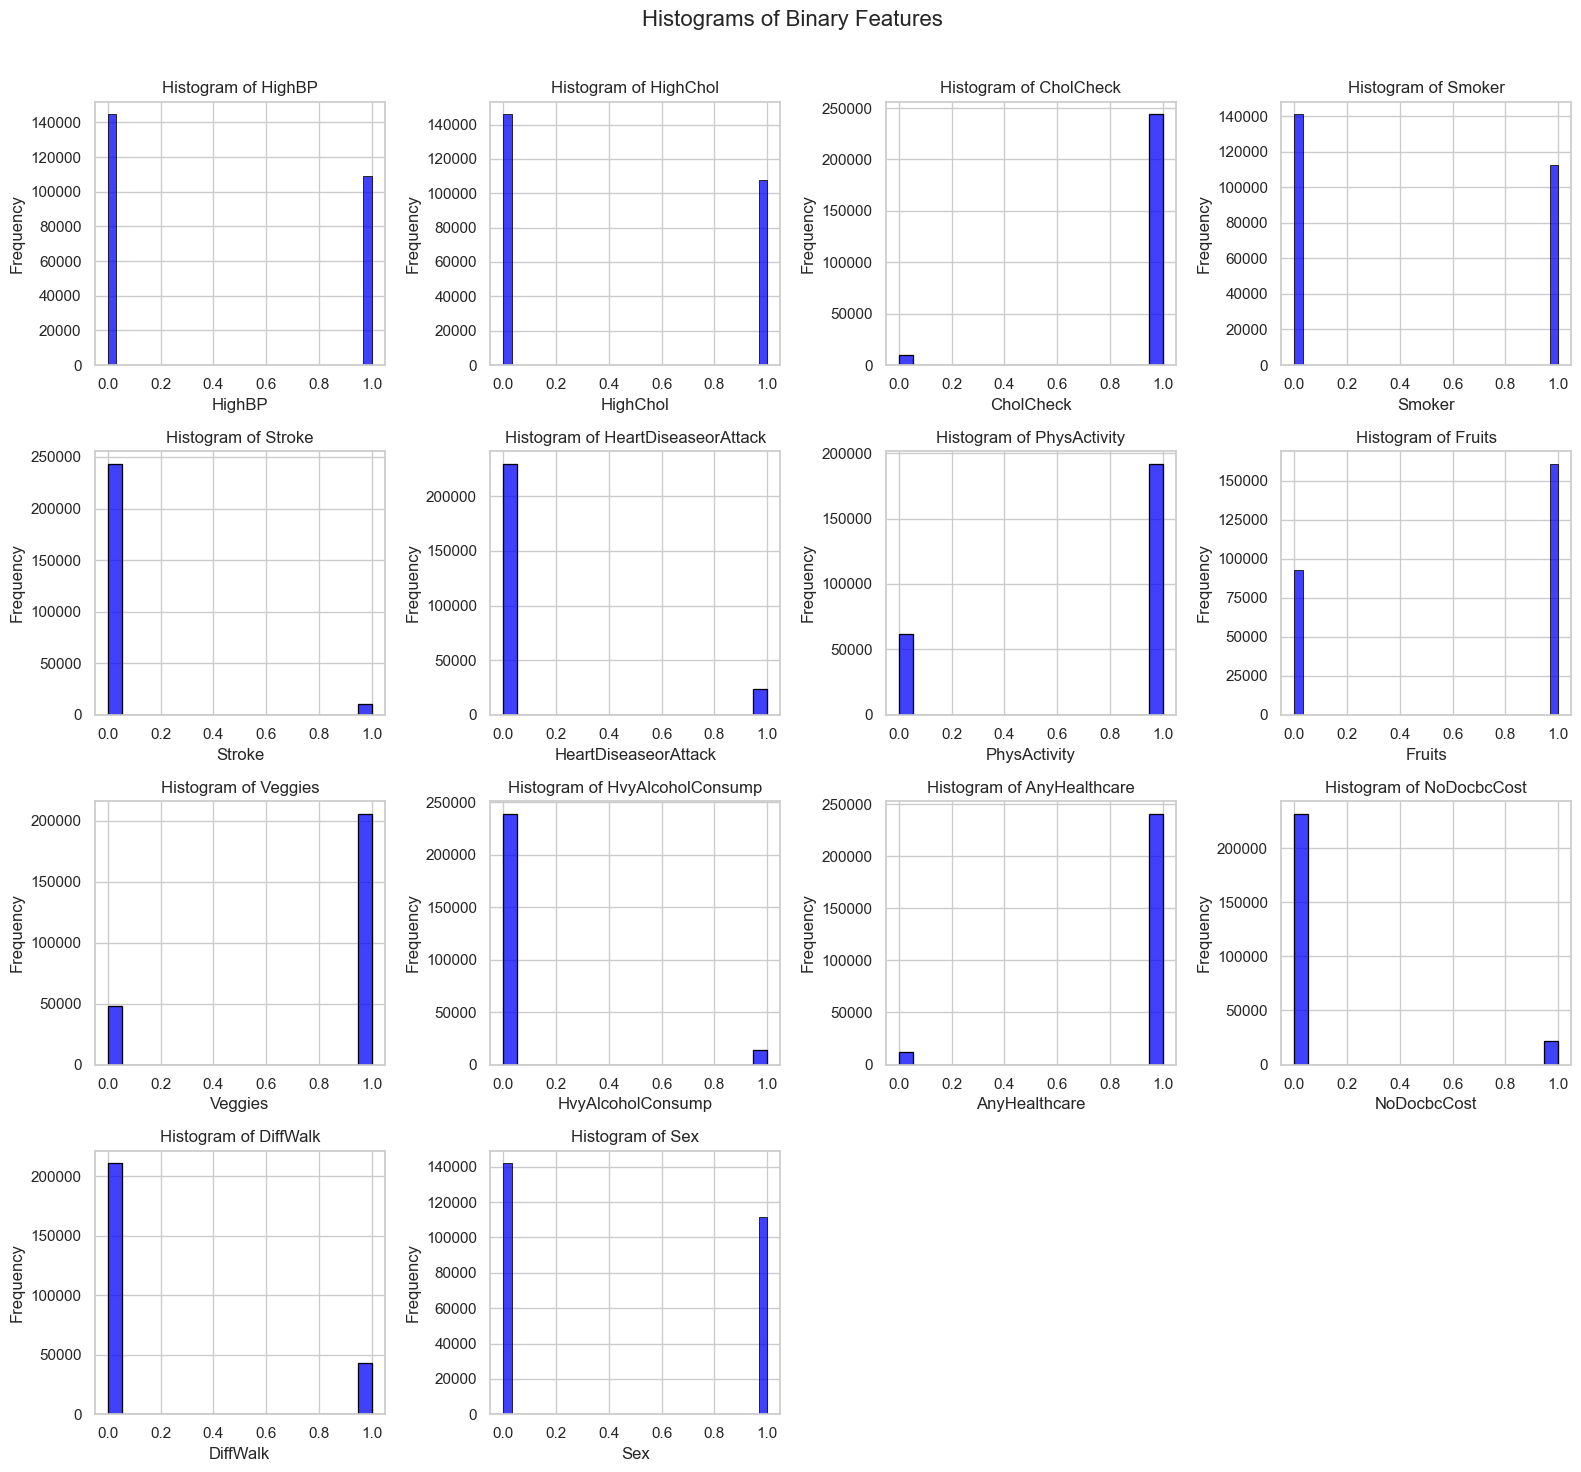

In [8]:
# Histograms for continuous numerical variables
sns.histplot(df['BMI'], bins=40, kde=True, edgecolor='black',color='blue')
plt.title('Distribution of BMI')
plt.ylabel("Frequency")
plt.show()

#Bar plots for ordinal numeric variables
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))
axes = axes.flatten() # Flatten the axes array for easy iteration

for i, col in enumerate(ordinal_numeric_cols):
    sns.histplot(df[col], bins=40,  ax=axes[i], edgecolor='black',color='blue')
    axes[i].set_title(f"Histogram of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Histograms of Ordinal Numeric Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Bar plots for binary variables    
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 15))
axes = axes.flatten() # Flatten the axes array for easy iteration   

for i, col in enumerate(binary_cols):
    sns.histplot(df[col],   ax=axes[i], edgecolor='black',color='blue')
    axes[i].set_title(f"Histogram of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Histograms of Binary Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

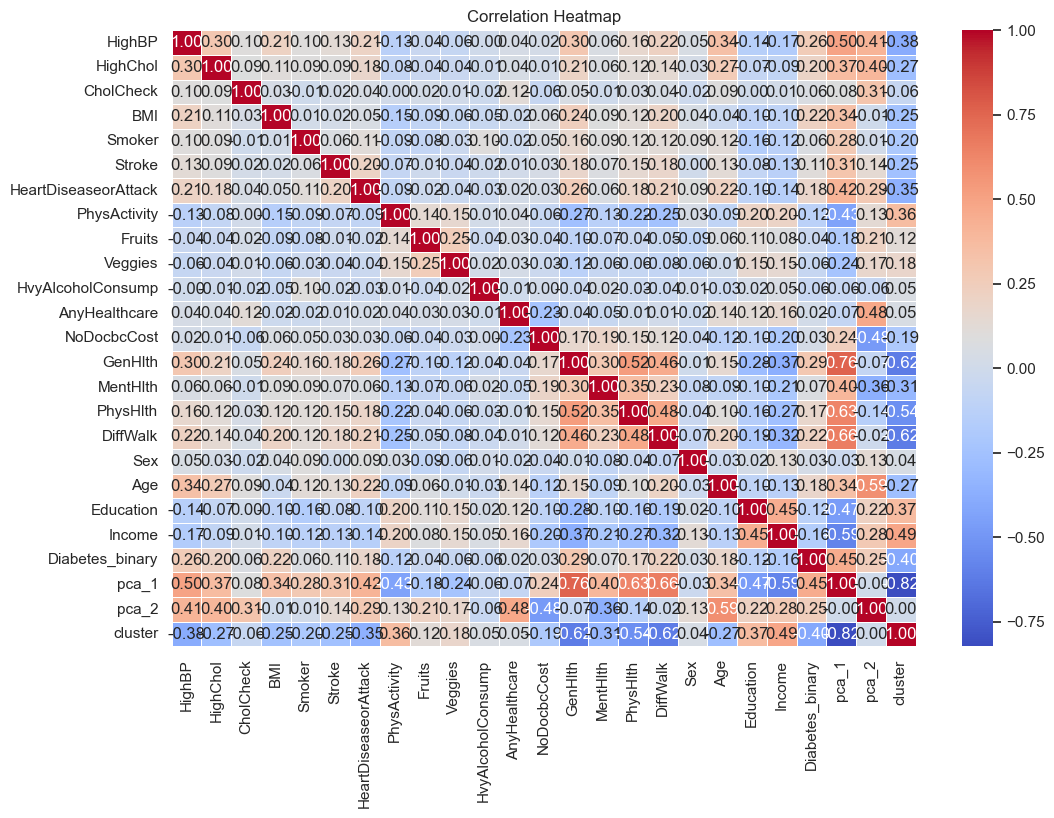

In [18]:
# Correlation Matrix
# Select numerical columns only

#drop ID column from df
df.drop(columns=['ID'], inplace=True)
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()  # Only numeric columns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

From the correlation matrix, we can observe that no features are highly correlated with each other. The highest correlation is between ```PhysHlth``` and ```GenHlth``` with a correlation of 0.52. 

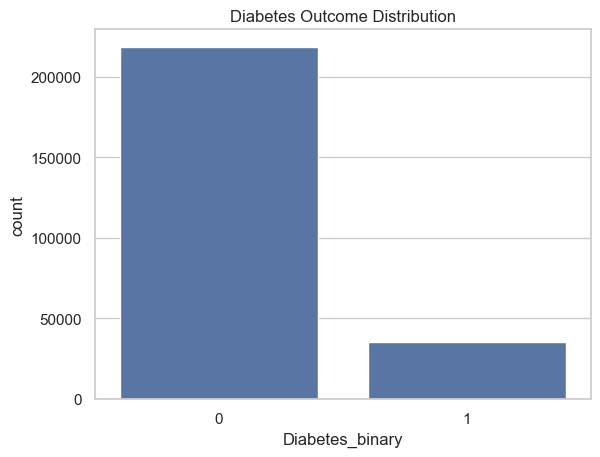

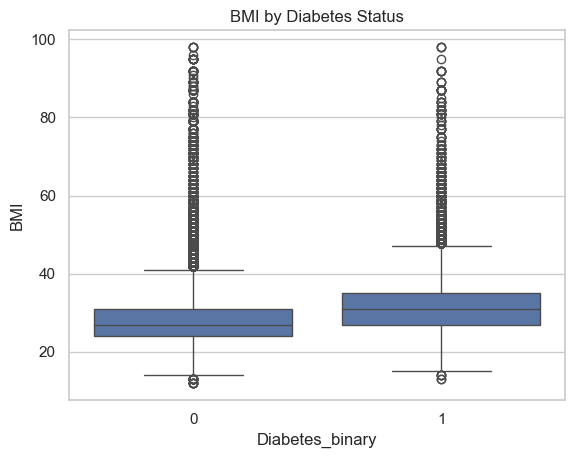

In [14]:
# Target variable
sns.countplot(x='Diabetes_binary', data=df)
plt.title('Diabetes Outcome Distribution')
plt.show()

# Example: BMI vs Diabetes
sns.boxplot(x='Diabetes_binary', y='BMI', data=df)
plt.title('BMI by Diabetes Status')
plt.show()

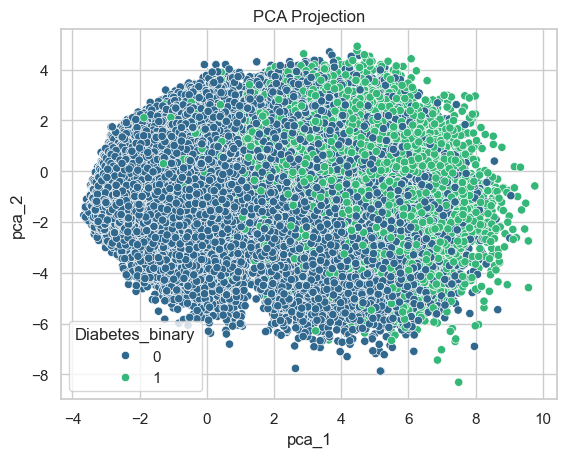

In [29]:
# Scale numeric features
df_PCA = df.copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_PCA)

# Apply PCA
pca = PCA(n_components=2, random_state=0)
pca_result = pca.fit_transform(X_scaled)

# Add to dataframe for plotting
df_PCA['pca_1'] = pca_result[:,0]
df_PCA['pca_2'] = pca_result[:,1]

sns.scatterplot(x='pca_1', y='pca_2', hue='Diabetes_binary', data=df_PCA, palette='viridis')
plt.title('PCA Projection')
plt.show()

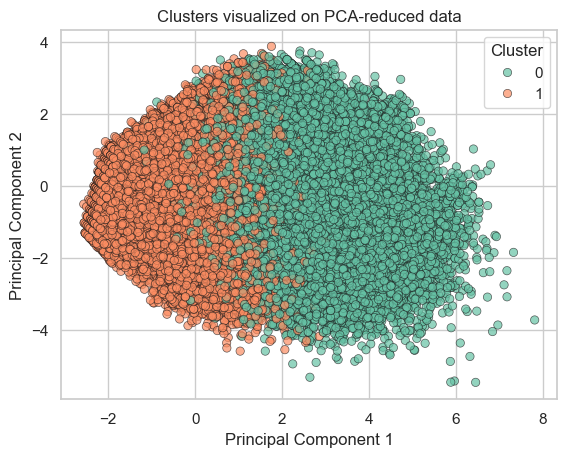

In [32]:
# Fit KMeans
df_kmeans = df.copy()
kmeans = KMeans(n_clusters=2, random_state=42)
df_kmeans['cluster'] = kmeans.fit_predict(X_scaled)

sns.scatterplot(
    x='pca_1', y='pca_2', 
    hue='cluster', 
    data=df_kmeans, 
    palette='Set2', 
    alpha=0.7, 
    edgecolor='k'
)
plt.title('Clusters visualized on PCA-reduced data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [33]:
pd.crosstab(df_kmeans['cluster'], df_kmeans['Diabetes_binary'], normalize='index')
# This will show the proportion of diabetes status within each cluster

Diabetes_binary,0,1
cluster,,
0,0.634902,0.365098
1,0.947410,0.052590


*Correlation between all*

In [ ]:
y = combined_df['Nutrition Density']

# Create a copy of the dataframe to avoid modifying the original
scaled_df = combined_df.copy()

# Initialize the scaler
scaler = StandardScaler()

# Scale the numeric columns
scaled_df[numeric_cols] = scaler.fit_transform(combined_df[numeric_cols])

# scaled features
X_scaled = scaled_df.drop(columns=['Nutrition Density','food'])
X_scaled.head()

# Create subplots for each feature
n_features = len(numeric_cols)
n_cols = 4  # Number of columns in the subplot grid
n_rows = (n_features + n_cols - 1) // n_cols  # Calculate number of rows needed

plt.figure(figsize=(20, 5*n_rows))

# Create scatter plots for each feature
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    correlation, p_value = stats.pearsonr(scaled_df[col], scaled_df['Nutrition Density'])
    
    # Create scatter plot
    sns.scatterplot(data=scaled_df, x=col, y='Nutrition Density', alpha=0.5)
    
    # Add correlation to title
    plt.title(f'{col} vs Nutrition Density\nPearson r = {correlation:.3f}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print correlation values
correlations = scaled_df[numeric_cols].corrwith(scaled_df['Nutrition Density']).sort_values(ascending=False)
print("\nCorrelation with Nutrition Density:")
print(correlations)

# Feature Engineering & Preprocessing

# Model Building

# Model Comparison & Selection